In [1]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
from bmxobs.TheoryPredictor import TheoryPredictor
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1
from scipy.optimize import least_squares
import copy

In [2]:
bmxobs.__path__

['/direct/astro+u/wcook/bmxobs/bmxobs']

In [51]:
D=bmxobs.BMXSingleFreqObs("pas/210904_2300")

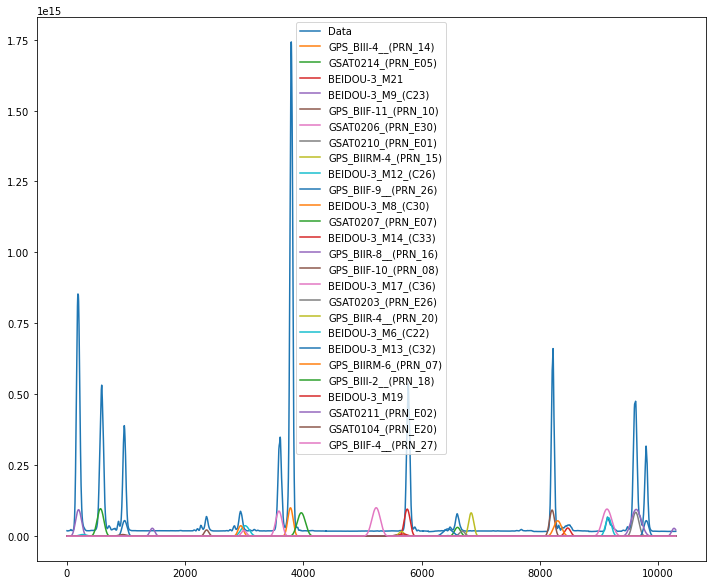

[3794]


In [52]:
cut = [0,len(D[11])]
channel = 11

plt.figure(figsize=(12,10))
plt.plot(D[channel][cut[0]:cut[1]].real,label='Data')

tracks = {}
sats = {}
for n,s in zip(D.sat_id,D.sat):
    if "COS" not in n:
        #dx= np.exp(-np.cos(s['alt'])**2/(2*0.05**2))
        track = np.array([np.cos(s['alt'])*np.cos(s['az']),np.cos(s['alt'])*np.sin(s['az'])]).T
        dx = SingleFreqGeometry().point_source(channel,1,track).real
        if max(dx[cut[0]:cut[1]])>0.02:
            plt.plot(dx[cut[0]:cut[1]]*1e14,label=n)
            tracks[n] = track
            sats[n] = dx
        
plt.legend()
plt.show()
print(np.arange(cut[0],cut[1])[D[channel][cut[0]:cut[1]].real==max(D[channel][cut[0]:cut[1]].real)])

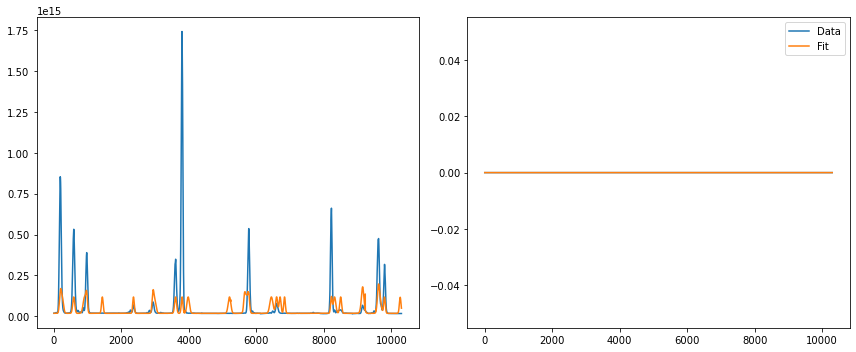

In [57]:
cut = [0,-1]
channels = [11]
#channels = [12,13,14,23,24,34]

params = {'D1_beam_center_x':0.01328331,
        'D1_beam_center_y':-0.01839416,
        'D1_beam_sigma_x':0.98700095,
        'D1_beam_sigma_y':1.13144178,
        'D1_beam_smooth_x':0.05319494,
        'D1_beam_smooth_y':0.04636066,
        'CH11_offset':sum(D[11]-abs(D[12])*abs(D[13])/abs(D[23]))/len(D[11]),
        'D2_beam_center_x':0.00728514,
        'D2_beam_center_y':-0.02441502,
        'D2_beam_sigma_x':0.08779658,
        'D2_beam_sigma_y':0.06067945,
        'D2_beam_smooth_x':0.05800788,
        'D2_beam_smooth_y':0.04612687,
        'CH22_offset':sum(D[22]-abs(D[12])*abs(D[23])/abs(D[13]))/len(D[11]),
        'D3_beam_center_x':-0.00387011,
        'D3_beam_center_y':-0.01259496,
        'D3_beam_sigma_x':0.04895078,
        'D3_beam_sigma_y':0.06059037,
        'D3_beam_smooth_x':0.06655913,
        'D3_beam_smooth_y':0.0569397,
        'CH33_offset':sum(D[33]-abs(D[13])*abs(D[23])/abs(D[12]))/len(D[11]),
        'D4_beam_center_x':-0.0120964, 
        'D4_beam_center_y':0.08688818,
        'D4_beam_sigma_x':0.03856946,
        'D4_beam_sigma_y':0.05609496,
        'D4_beam_smooth_x':0.03484349,
        'D4_beam_smooth_y':0.10496753,
        'CH44_offset':sum(D[44]-abs(D[24])*abs(D[34])/abs(D[23]))/len(D[11]),
        #'D_all_dist':4.4248027,
        'D1_pos_x':0,
        'D1_pos_y':4.4248027,
        'D1_phi':0,
        'D2_pos_x':4.4248027,
        'D2_pos_y':-0.03475731,
        'D2_phi':-0.23402276,
        'D3_pos_x':0.24973297,
         'D3_pos_y':-4.30383942,
        'D3_phi':2.36467821,
        'D4_pos_x':-4.16894658,
        'D4_pos_y':0.20006629,
        'D4_phi':-0.34090914,
        }

for n in sats.keys():
    for i in range(4):
        params['A{}_{}'.format(i+1,n)] = 1e7

theory = TheoryPredictor(D, satAmp=0.)
theory.setParameters(params)
#print(theory.allParameters())

theory.showFit(cut=cut, channels=channels)

[ 4.10694537e+07  2.24344048e+07  2.24705904e+07  2.89729958e+07
  2.49645706e+07  1.81473358e+07  2.10444197e+07  1.03206898e+06
  3.06532219e+06  1.81064150e+07  8.06543058e+06  7.75086168e+06
  5.04122928e+06  4.75712914e+05  7.15816104e+06  5.70670113e+06
  1.83381070e+06 -4.30633219e+05  4.40358112e+06  2.58492089e+06
  3.36791357e+06  1.49135215e+06 -2.34806113e+04  6.27775270e+06
  6.02011095e+06  3.26612316e+05]


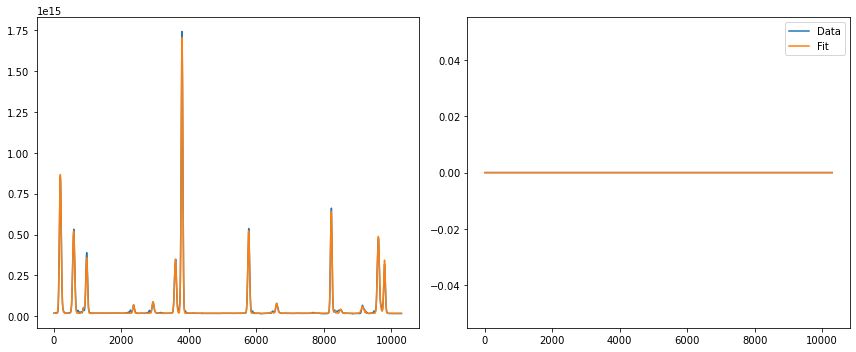

[40194177.8684576  21062722.28503838 21032898.64252588 27404878.08743029
 24027329.82266686 17478632.64925658 21687201.13843419  1111982.90515235
   140934.63862229 19668478.00922746  9846681.31088228  8446061.93968238
  2970953.00343701   386384.08122583  8244853.56303455  4900012.72466564
  1659927.91715412   820708.97205914  6799965.61355239  1479355.48665057
  4142131.99647345   549205.32214558   -85416.10858614  5519530.37021601
  5177163.50862086  -150133.38009874]


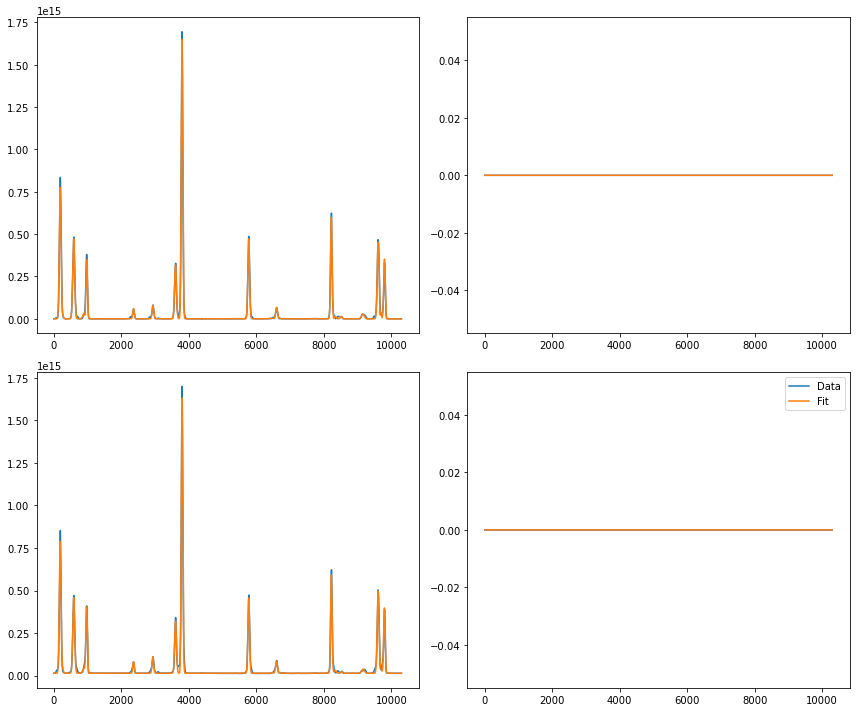

[ 4.66795869e+07  2.65794098e+07  2.63383494e+07  2.92089237e+07
  3.11144317e+07  2.37531932e+07  2.01058855e+07  4.26270925e+05
  4.59247892e+06  1.39305199e+07  6.66814550e+06  5.49906254e+06
  2.52978590e+06  8.17297249e+05  5.92442470e+06  7.84716686e+06
  2.71702615e+06  3.48792420e+05 -6.89985088e+05  1.76047910e+06
  6.08350163e+06  1.47611316e+06  3.67883581e+04  2.23279295e+06
  9.23410578e+06  2.20970237e+05]


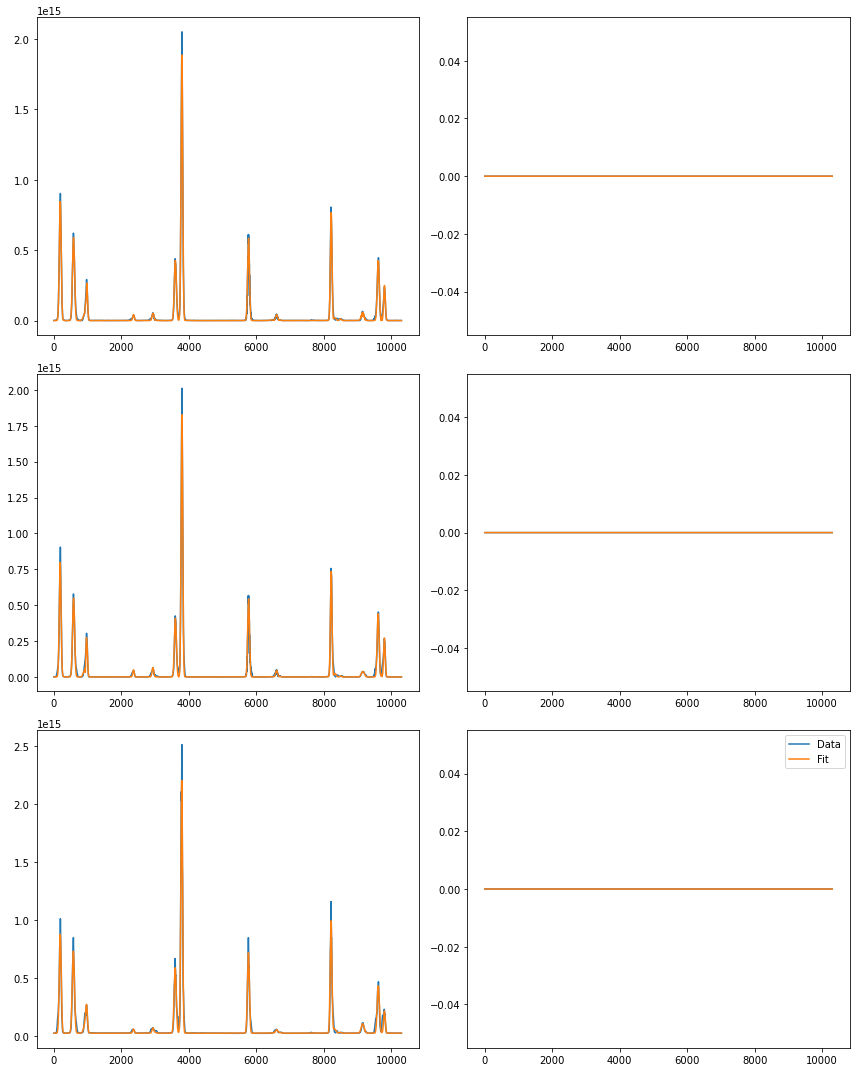

[ 3.95710365e+07  2.42196960e+07  2.31090321e+07  8.50609718e+06
  3.06778594e+07  2.60116503e+07  4.04074460e+06  8.24264792e+04
  1.08453396e+06  1.57346059e+06  4.19732722e+06  7.48647449e+05
  3.40636915e+06  8.36228376e+05  6.15333008e+05  2.10291253e+07
  7.09617324e+06  1.36599578e+07  6.88677786e+05  3.12640537e+06
 -2.08203986e+06  2.27336928e+06  1.15088955e+04 -2.63930984e+06
  2.99719657e+05 -1.01091700e+05]


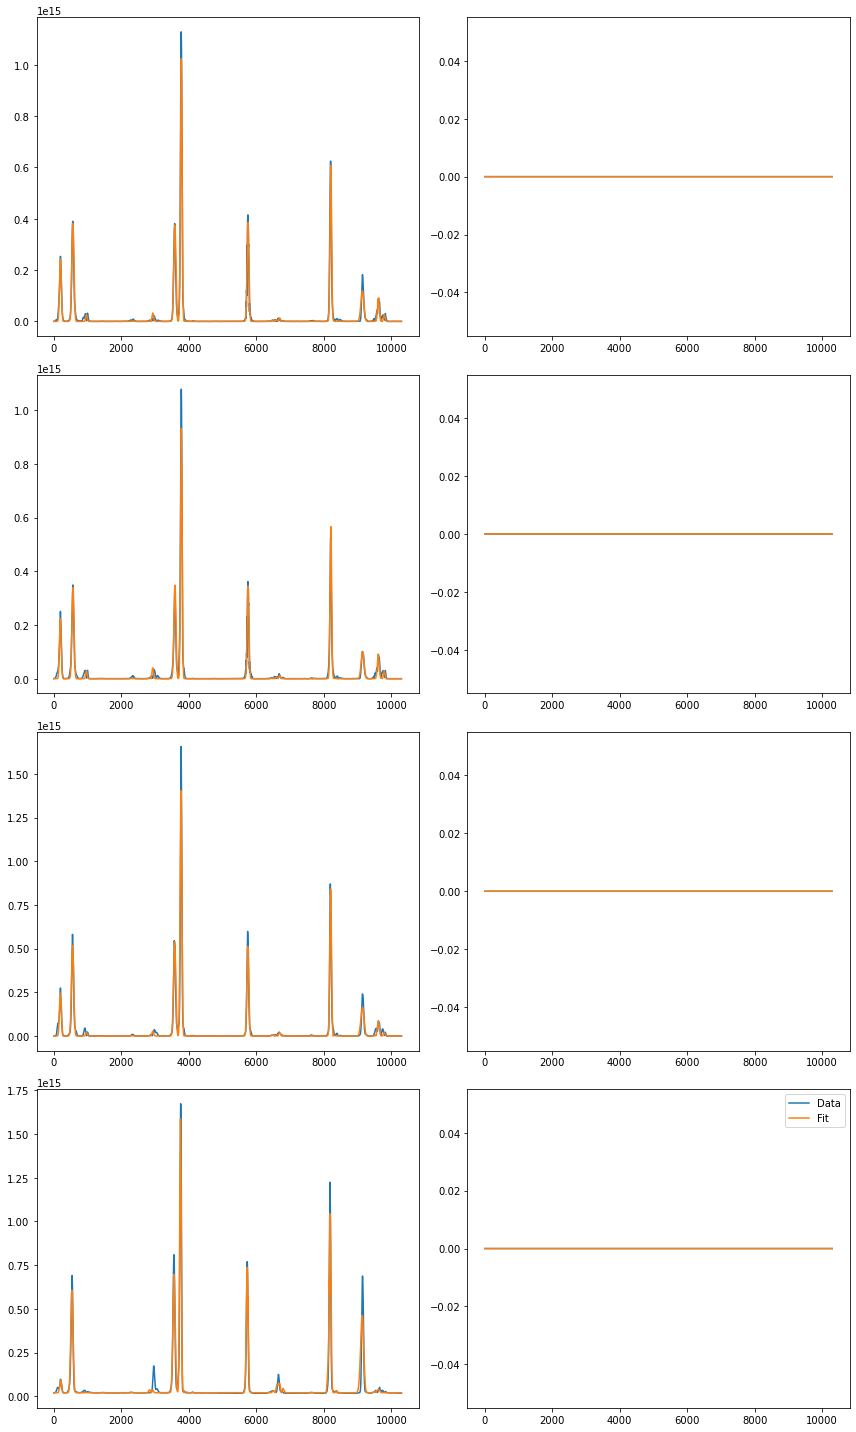

In [123]:
channelSet = [[11],[12,22],[13,23,33],[14,24,34,44],
              [55],[56,66],[57,67,77],[58,68,78,88]]

for i in range(4):
    ch = channelSet[i]
    names = []
    for n in sats.keys():
        names.append('A{}_{}'.format(i+1,n))

    theory.fit(names, mode = 'amp', channels = ch)

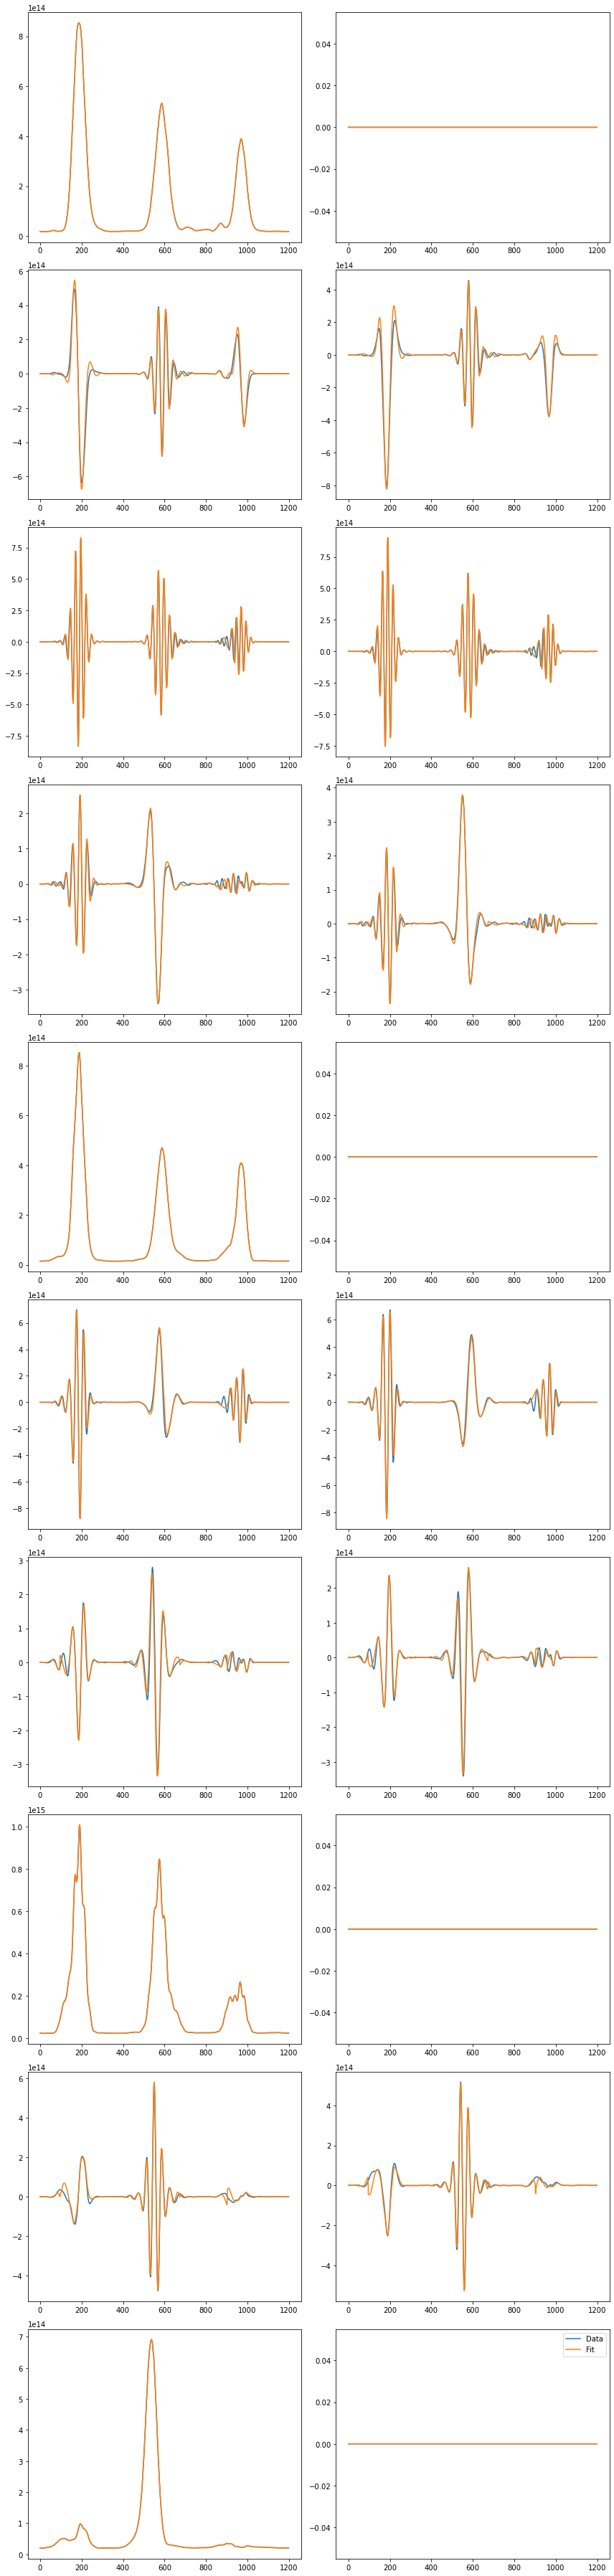

In [126]:
theory.showFit(cut=[0,1200], channels = [11,12,13,14,22,23,24,33,34,44], mode = 'phase')

[ 0.01305794 -0.01856945  3.32250843  9.07113783  0.05354774  0.0460961 ]


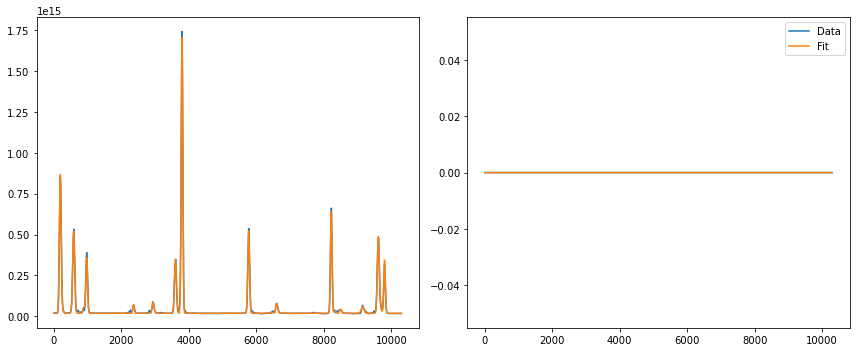

[ 0.01263792 -0.02010143  1.198176    1.32972871  0.04689885  0.04400183]


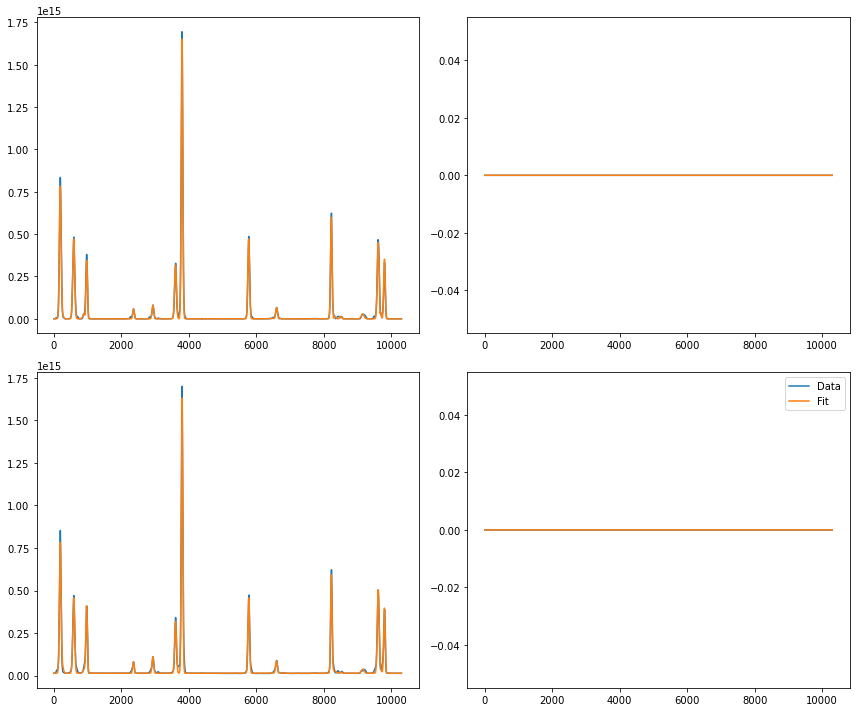

[-0.0015082  -0.01078018  1.03186606  1.40169543  0.04571408  0.05223242]


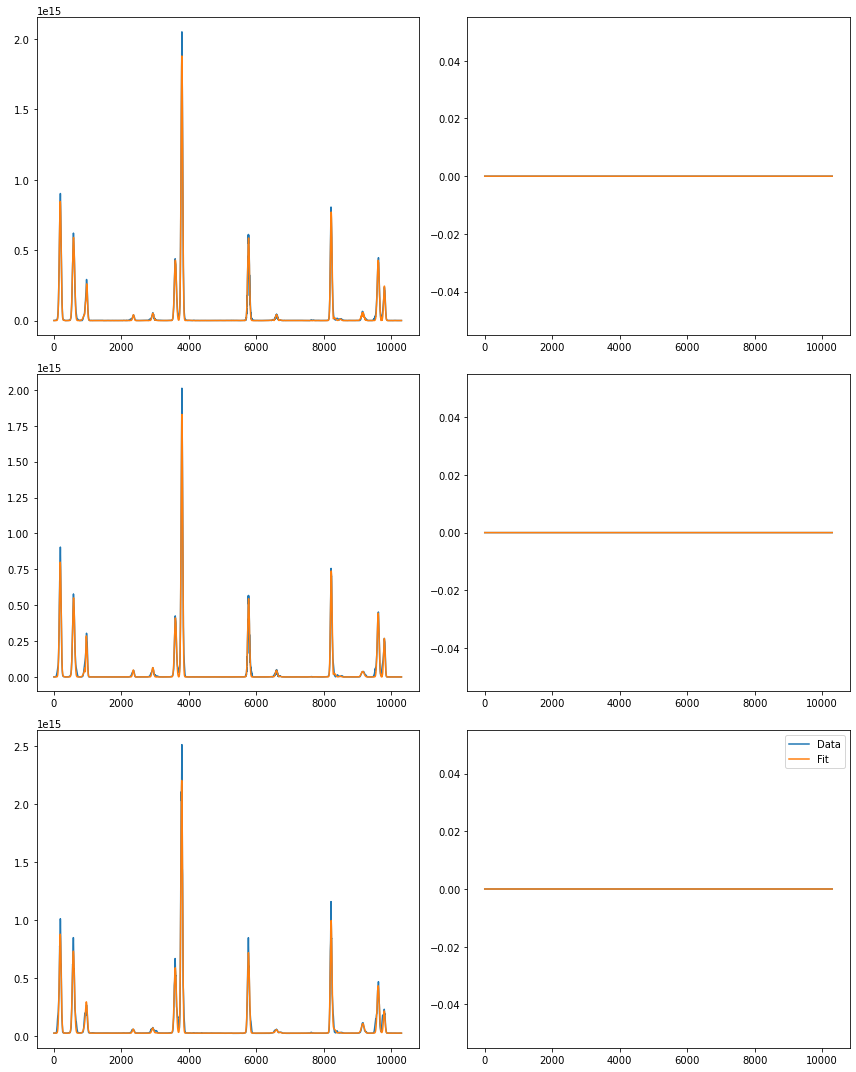

[-0.01640376  0.04300508  0.03821187  0.04343574  0.03468617  0.06988416]


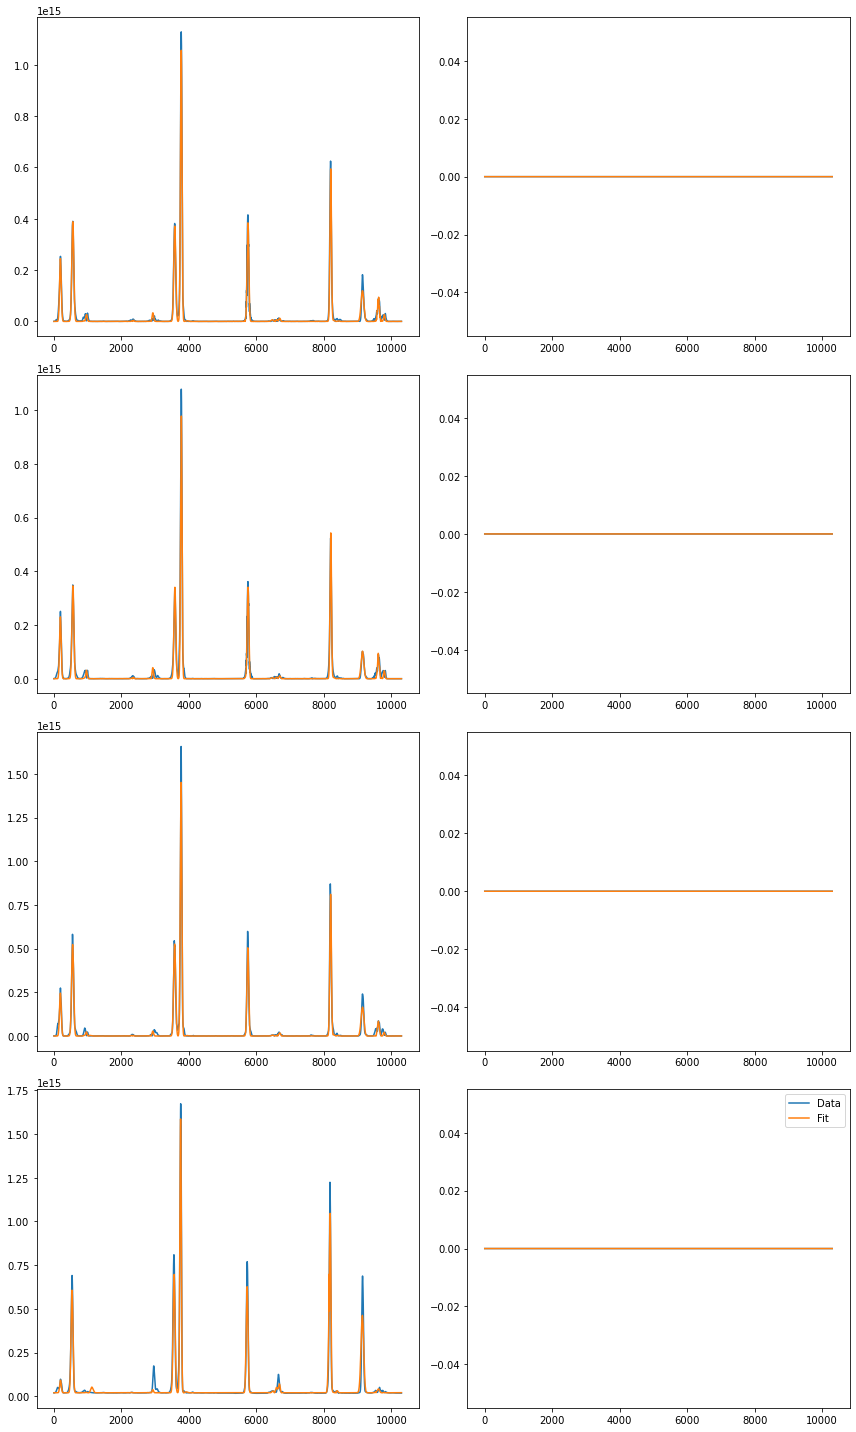

In [127]:
channelSet = [[11],[12,22],[13,23,33],[14,24,34,44],
              [55],[56,66],[57,67,77],[58,68,78,88]]

for i in range(4):
    ch = channelSet[i]
    names = ['D{}_beam_center_x'.format(i+1),
            'D{}_beam_center_y'.format(i+1),
            'D{}_beam_sigma_x'.format(i+1),
            'D{}_beam_sigma_y'.format(i+1),
            'D{}_beam_smooth_x'.format(i+1),
            'D{}_beam_smooth_y'.format(i+1)
            ]
    

    theory.fit(names, mode = 'amp', channels = ch)

[ 4.41190917 -0.05510542 -0.22399342]


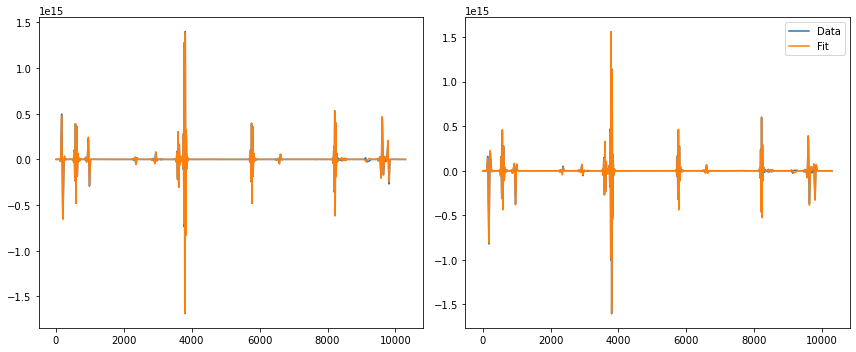

[ 0.24577505 -4.31256795  2.36893137]


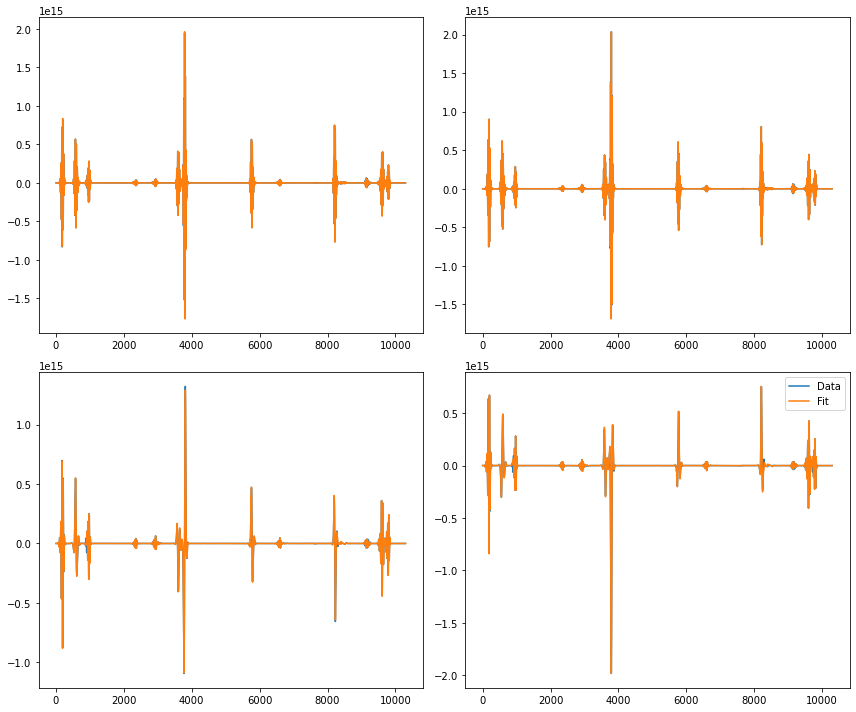

[-4.1780034   0.18750564 -0.33650429]


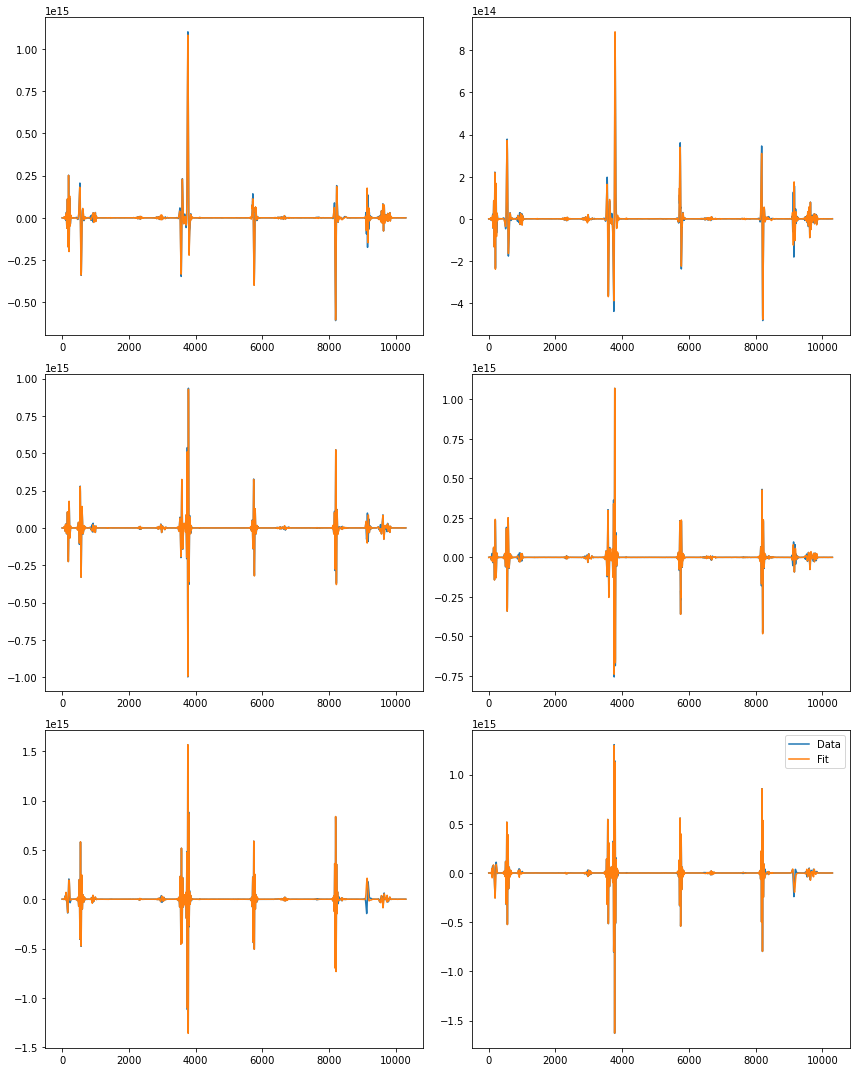

In [128]:
channelSet = [[12],[13,23],[14,24,34],
              [56],[57,67],[58,68,78]]

for i in range(3):
    ch = channelSet[i]
    names = ['D{}_pos_x'.format(i+2),
             'D{}_pos_y'.format(i+2),
             'D{}_phi'.format(i+2)
            ]

    theory.fit(names, mode = 'phase', channels = ch)

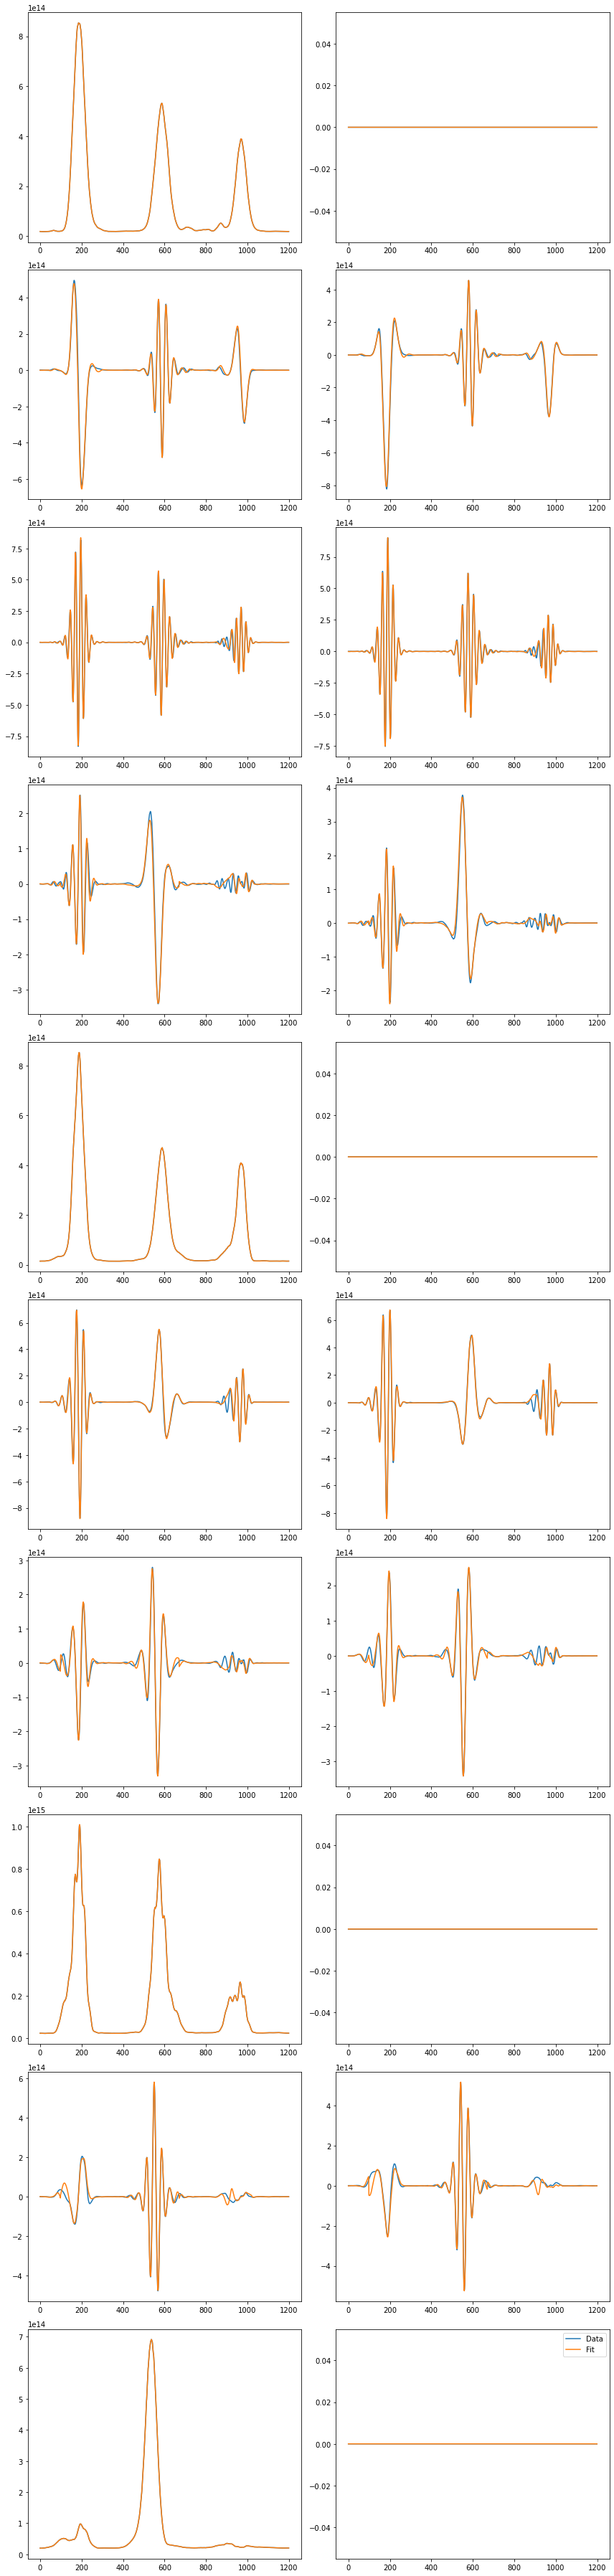

In [129]:
theory.showFit(cut=[0,1200], channels = [11,12,13,14,22,23,24,33,34,44], mode = 'phase')

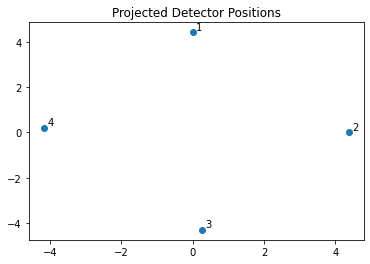

In [12]:
p = theory.readParameters()
xs = []
ys = []
for i in range(4):
    xs.append(p['D{}_pos_x'.format(i+1)])
    ys.append(p['D{}_pos_y'.format(i+1)])
plt.title('Projected Detector Positions')
plt.scatter(xs,ys)
for i in range(4):
    plt.text(xs[i]+0.1,ys[i]+0.1,str(i+1))
plt.show()

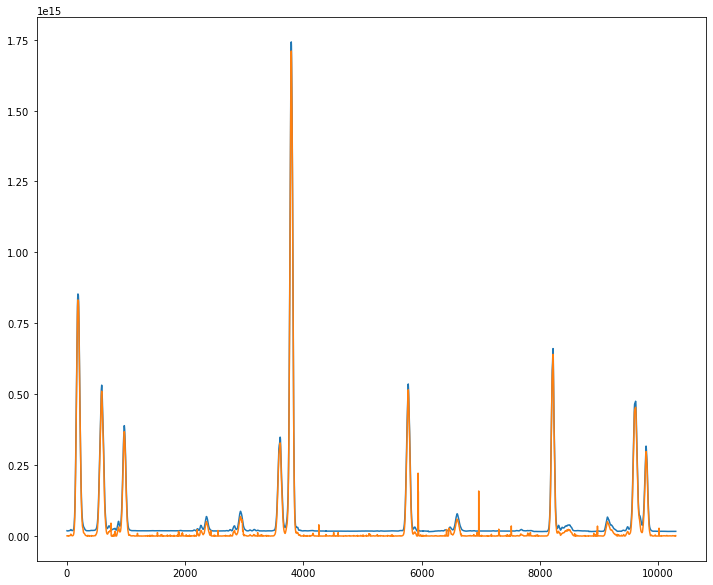

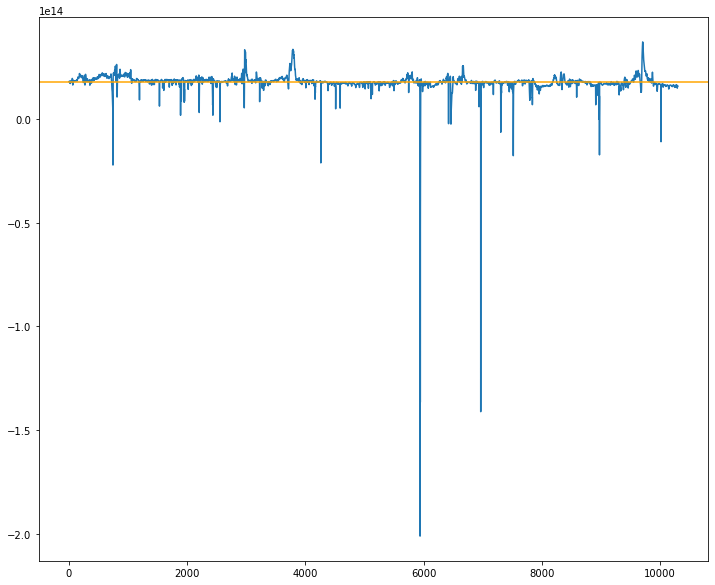

17800528617401.207


In [84]:
plt.figure(figsize=(12,10))
plt.plot(D[11])
plt.plot(abs(D[12])*abs(D[13])/abs(D[23]))
plt.show()

diff = D[11]-abs(D[12])*abs(D[13])/abs(D[23])
plt.figure(figsize=(12,10))
plt.plot(diff)
avg = sum(D[11]-abs(D[12])*abs(D[13])/abs(D[23]))/len(D[11])
plt.axhline(avg, color='orange')
plt.show()
print(avg)

In [3]:
def getPhaseFit(Theory):
    detectors = [2,3,4]
    channelSet = [[12],[13,23],[14,24,34],
                  [56],[57,67],[58,68,78]]

    Params = []
    for T in Theory:
        params = []
        
        for i,d in enumerate(detectors):
            ch = channelSet[i]
            names = ['D{}_pos_x'.format(d),
                     'D{}_pos_y'.format(d),
                     'D{}_phi'.format(d)
                    ]

            params.append(T.fit(names, mode = 'phase', channels = ch, plot=False))
        Params.append(params)
    
    return np.array(Params)

In [4]:
def getBeamFit(Theory):
    detectors = [1,2,3,4]
    channelSet = [[11],[12,22],[13,23,33],[14,24,34,44],
                  [55],[56,66],[57,67,77],[58,68,78,88]]
    Params = []
    for T in Theory:
        params = []

        for i,d in enumerate(detectors):
            ch = channelSet[i]
            names = ['D{}_beam_center_x'.format(d),
                    'D{}_beam_center_y'.format(d),
                    'D{}_beam_sigma_x'.format(d),
                    'D{}_beam_sigma_y'.format(d),
                    'D{}_beam_smooth_x'.format(d),
                    'D{}_beam_smooth_y'.format(d)
                    ]


            params.append(T.fit(names, mode = 'amp', channels = ch, plot=False))
        params.append(params)
    
    return np.array(Params)

In [17]:
def getAmpFit(Theory, Sats):
    detectors = [1,2,3,4]
    channelSet = [[11],[12,22],[13,23,33],[14,24,34,44],
                  [55],[56,66],[57,67,77],[58,68,78,88]]
    
    for i,T in enumerate(Theory):
        
        for j,d in enumerate(detectors):
            ch = channelSet[j]
            names = ['A{}_{}'.format(d,n) for n in Sats[i]]
            
    return

In [6]:
def setSignificantSats(Theory):
    Sats = []
    for T in Theory:
        sats = []
        p = {}
        
        for n,s in zip(T.data.sat_id,T.data.sat):
            if "COS" not in n:
                if min(np.cos(s['alt'])**2)<0.01:
                    sats.append(n)
                    p['A_{}'.format(n)] = 1e7
                else:
                    p['A_{}'.format(n)] = 0
        
        T.setParameters(p)
        Sats.append(sats)
    return Sats

In [7]:
Data_ids = ["pas/210904_2300","pas/210905_2300","pas/210906_2300","pas/210907_2300"]
DataSet = [bmxobs.BMXSingleFreqObs(ids) for ids in Data_ids]

In [9]:
Theory = [TheoryPredictor(Data, satAmp=0) for Data in DataSet]

for T in Theory:
    T.setParameters({'D1_beam_center_x':0.01328331,
                        'D1_beam_center_y':-0.01839416,
                        'D1_beam_sigma_x':0.98700095,
                        'D1_beam_sigma_y':1.13144178,
                        'D1_beam_smooth_x':0.05319494,
                        'D1_beam_smooth_y':0.04636066,
                        'CH11_offset':sum(T.data[11]-abs(T.data[12])*abs(T.data[13])/abs(T.data[23]))/len(T.data[11]),
                        'D2_beam_center_x':0.00728514,
                        'D2_beam_center_y':-0.02441502,
                        'D2_beam_sigma_x':0.08779658,
                        'D2_beam_sigma_y':0.06067945,
                        'D2_beam_smooth_x':0.05800788,
                        'D2_beam_smooth_y':0.04612687,
                        'CH22_offset':sum(T.data[22]-abs(T.data[12])*abs(T.data[23])/abs(T.data[13]))/len(T.data[11]),
                        'D3_beam_center_x':-0.00387011,
                        'D3_beam_center_y':-0.01259496,
                        'D3_beam_sigma_x':0.04895078,
                        'D3_beam_sigma_y':0.06059037,
                        'D3_beam_smooth_x':0.06655913,
                        'D3_beam_smooth_y':0.0569397,
                        'CH33_offset':sum(T.data[33]-abs(T.data[13])*abs(T.data[23])/abs(T.data[12]))/len(T.data[11]),
                        'D4_beam_center_x':-0.0120964, 
                        'D4_beam_center_y':0.08688818,
                        'D4_beam_sigma_x':0.03856946,
                        'D4_beam_sigma_y':0.05609496,
                        'D4_beam_smooth_x':0.03484349,
                        'D4_beam_smooth_y':0.10496753,
                        'CH44_offset':sum(T.data[44]-abs(T.data[24])*abs(T.data[34])/abs(T.data[23]))/len(T.data[11]),
                        #'D_all_dist':4.4248027,
                        'D1_pos_x':0,
                        'D1_pos_y':4.4248027,
                        'D1_phi':0,
                        'D2_pos_x':4.4248027,
                        'D2_pos_y':-0.03475731,
                        'D2_phi':-0.23402276,
                        'D3_pos_x':0.24973297,
                         'D3_pos_y':-4.30383942,
                        'D3_phi':2.36467821,
                        'D4_pos_x':-4.16894658,
                        'D4_pos_y':0.20006629,
                        'D4_phi':-0.34090914,
                        })

In [12]:
Sats = setSignificantSats(Theory)

In [ ]:
getAmpFit(Theory, Sats)

In [ ]:
beamParams = getBeamFit(Theory)
avgParams = beamParams.sum(axis=0)/len(beamParams)
sdvParams = np.sqrt(((beamParams-avgParams)**2).sum(axis=0)/len(beamParams))
print(avgParams)
print(sdvParams)

In [ ]:
phaseParams = getPhaseFit(Theory)
avgParams = phaseParams.sum(axis=0)/len(phaseParams)
sdvParams = np.sqrt(((phaseParams-avgParams)**2).sum(axis=0)/len(phaseParams))
print(avgParams)
print(sdvParams)

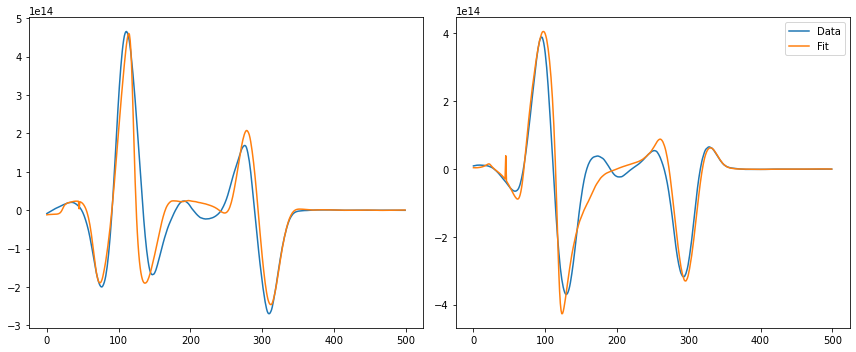

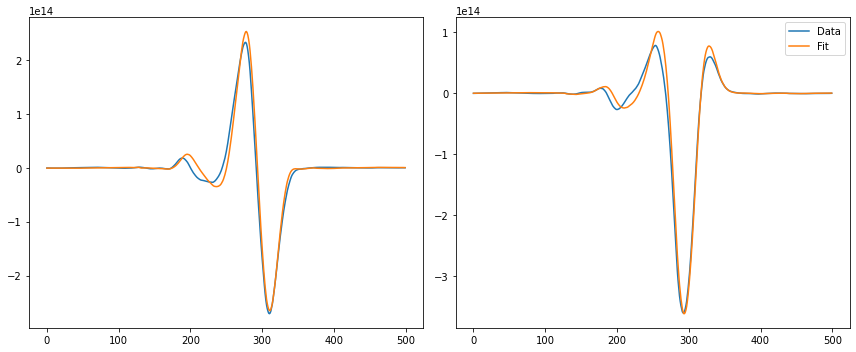

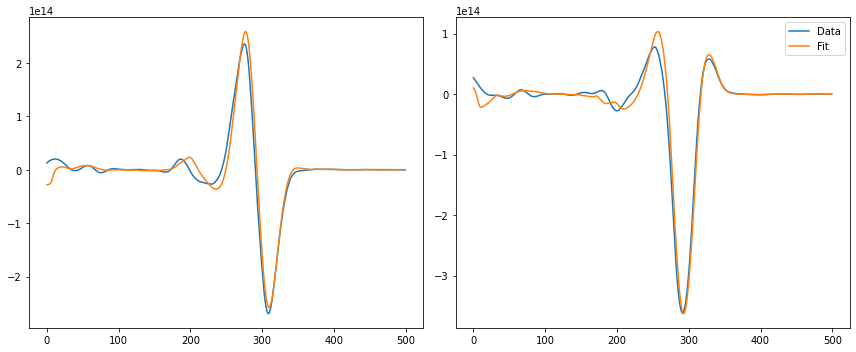

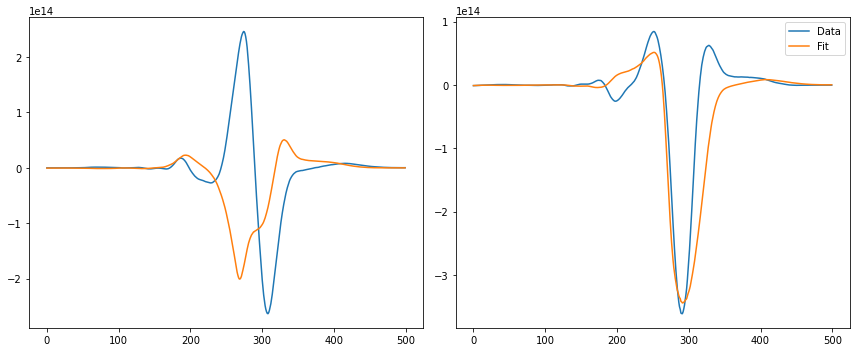

In [120]:
cut = [9500,10000]
channels = [12]
mode = 'phase'

for T in Theory:
    T.showFit(channels = channels, cut=cut,mode=mode)